<a href="https://colab.research.google.com/github/tienhuynh96/ML_demo/blob/main/Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Machine learning for Regression
- KNN
- Decision Tree
- Random Forest
- XGboost
- SVM

# 1.Get data

In [ ]:
# https://drive.google.com/file/d/1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp/view?usp=sharing
!gdown --id 1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp
To: /content/Problem3.csv
100% 37.4k/37.4k [00:00<00:00, 57.6MB/s]


# 2.Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import SVM support vector machine
from sklearn.svm import SVR
# Import XGB
import xgboost as xgb
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Import Decision Tree Class
from sklearn.tree import DecisionTreeRegressor
# Import KNN
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import (
    StandardScaler,             # Using for Scaler
    LabelEncoder,               # Encoder for Lable
    OneHotEncoder,              # OneHot Encoder
    OrdinalEncoder              # Ordinal Encoder
)

from sklearn.compose import ColumnTransformer   # Build transform of both one hot and ordinal encoder
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Save accuracy of each model to scores
scores =[]

# Check
# Save accuracy of each model to dic_scores
dic_scores ={}

# 3.Load Dataset

In [ ]:
dataset_path = '/content/Problem3.csv'
data_df = pd.read_csv(dataset_path)
data_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,4.468204,26.2,94.3,1.808289,8.2,51,6.7,False,0.000000
1,7,4,oct,tue,4.517431,35.4,669.1,2.041220,18.0,33,0.9,False,0.000000
2,7,4,oct,sat,4.517431,43.7,686.9,2.041220,14.6,33,1.3,False,0.000000
3,8,6,mar,fri,4.529368,33.3,77.5,2.302585,8.3,97,4.0,True,0.000000
4,8,6,mar,sun,4.503137,51.3,102.2,2.360854,11.4,99,1.8,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4,3,aug,sun,4.414010,56.7,665.6,1.064711,27.8,32,2.7,False,2.006871
506,2,4,aug,sun,4.414010,56.7,665.6,1.064711,21.9,71,5.8,False,4.012592
507,7,4,aug,sun,4.414010,56.7,665.6,1.064711,21.2,70,6.7,False,2.498152
508,1,4,aug,sat,4.558079,146.0,614.7,2.509599,25.6,42,4.0,False,0.000000


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       510 non-null    int64  
 1   Y       510 non-null    int64  
 2   month   510 non-null    object 
 3   day     510 non-null    object 
 4   FFMC    510 non-null    float64
 5   DMC     510 non-null    float64
 6   DC      510 non-null    float64
 7   ISI     510 non-null    float64
 8   temp    510 non-null    float64
 9   RH      510 non-null    int64  
 10  wind    510 non-null    float64
 11  rain    510 non-null    bool   
 12  area    510 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(2)
memory usage: 48.4+ KB


In [ ]:
data_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,4.680392,4.294118,4.522609,111.837647,550.470392,2.228457,18.951569,44.029412,4.017255,1.121351
std,2.320534,1.234636,0.034979,63.853719,246.630662,0.428759,5.789930,15.968323,1.788793,1.401431
min,1.000000,2.000000,4.332048,3.000000,7.900000,0.741937,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,4.514151,73.250000,442.300000,2.041220,15.625000,32.250000,2.700000,0.000000
50%,4.000000,4.000000,4.528829,108.400000,664.200000,2.240710,19.300000,41.500000,4.000000,0.457245
75%,7.000000,5.000000,4.542230,142.400000,714.200000,2.484907,22.800000,53.000000,4.900000,2.025183
max,9.000000,9.000000,4.576771,291.300000,860.600000,4.044804,33.300000,99.000000,9.400000,6.995620


# 4.Preprocess dataset

## 4.1 Dealing with categorical data

In [ ]:
# Check Categorical data
categorical_cols = data_df.select_dtypes(include=['object', 'bool']).columns.to_list()
categorical_cols

['month', 'day', 'rain']

In [ ]:
for col_name in categorical_cols:
    n_categories = data_df[col_name].nunique()
    print(f'Number of categories in {col_name}: {n_categories}')

Number of categories in month: 12
Number of categories in day: 7
Number of categories in rain: 2


In [ ]:
# Encode Categorical Data

# Set OrinalEncoder
ordinal_encoder = OrdinalEncoder()
# Transform for categorical data
encoded_categorical_cols = ordinal_encoder.fit_transform(data_df[categorical_cols])

# Get encoded_categorical_df with name feature
encoded_categorical_df = pd.DataFrame(
  encoded_categorical_cols ,
  columns = categorical_cols
)

# Drop the past categorical data and concatenate the new one.
numerical_df = data_df.drop(categorical_cols , axis =1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df ] , axis =1)

In [ ]:
encoded_df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area,month,day,rain
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0.000000,7.0,0.0,0.0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0.000000,10.0,5.0,0.0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0.000000,10.0,2.0,0.0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,0.000000,7.0,0.0,1.0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0.000000,7.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4,3,4.414010,56.7,665.6,1.064711,27.8,32,2.7,2.006871,1.0,3.0,0.0
506,2,4,4.414010,56.7,665.6,1.064711,21.9,71,5.8,4.012592,1.0,3.0,0.0
507,7,4,4.414010,56.7,665.6,1.064711,21.2,70,6.7,2.498152,1.0,3.0,0.0
508,1,4,4.558079,146.0,614.7,2.509599,25.6,42,4.0,0.000000,1.0,2.0,0.0


## 4.2 Normalization

In [ ]:
# X = encoded_df.drop(columns=['area'])
# y = encoded_df['area']

# normalizer = StandardScaler()
# X_normalized = normalizer.fit_transform(X)
# y_encoded = y

In [ ]:
# Perform drop on the original DataFrame
X = encoded_df.drop(columns=['area'])
y = encoded_df['area']

In [ ]:
# Now apply StandardScaler
normalizer = StandardScaler()
X_normalized = normalizer.fit_transform(X)  # Normalize X
# y_normalized = normalizer.fit_transform(y.values.reshape(-1, 1)) #Normalize y and reshape

# Check if No normlize y
y_normalized = y


# 5.Train test split

In [ ]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X_normalized, y_normalized,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [ ]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')

Number of training samples: 357
Number of val samples: 153


# 6.Model and Training

## 6.1 SVM

### Model and Train

In [ ]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

### Evaluation

In [ ]:
y_pred_svm = svm.predict(X_val)
mae = mean_absolute_error(y_pred_svm, y_val)
mse = mean_squared_error(y_pred_svm, y_val)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error SVM: {mae}')
print(f'Mean Squared Error SVM: {mse}')

scores.append({"SVM": mse})
dic_scores['SVM'] =mse

Evaluation results on validation set:
Mean Absolute Error SVM: 1.1963374624327279
Mean Squared Error SVM: 2.6473361877515744


## 6.2 XGBOOST

### Model and Train

In [ ]:
xg_reg = xgb.XGBRegressor(seed=7, learning_rate=0.01, n_estimators=102, max_depth=3)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=102, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

In [ ]:
y_pred_xgb = xg_reg.predict(X_val)
mae = mean_absolute_error(y_pred_xgb, y_val)
mse = mean_squared_error(y_pred_xgb, y_val)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error XGBOOST: {mae}')
print(f'Mean Squared Error XGBOOST: {mse}')

scores.append({"XGBOOST": mse})
dic_scores['XGBOOST'] =mse

Evaluation results on validation set:
Mean Absolute Error XGBOOST: 1.2241880340668205
Mean Squared Error XGBOOST: 2.2820507697776953


## 6.3 Random Forest

In [ ]:
rd = RandomForestRegressor(
    random_state=random_state
)
rd.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
y_pred_rd = rd.predict(X_val)
mae = mean_absolute_error(y_pred_rd, y_val)
mse = mean_squared_error(y_pred_rd, y_val)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error Random-Forest: {mae}')
print(f'Mean Squared Error Random-Forest: {mse}')

scores.append({"Random-Forest": mse})
dic_scores['Random-Forest'] =mse

Evaluation results on validation set:
Mean Absolute Error Random-Forest: 1.2578092603669462
Mean Squared Error Random-Forest: 2.4186994551821


## 6.4 Decision Tree

In [ ]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=1)

In [ ]:
y_pred_dt = dt.predict(X_val)
mae = mean_absolute_error(y_pred_dt, y_val)
mse = mean_squared_error(y_pred_dt, y_val)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error Decision Tree: {mae}')
print(f'Mean Squared Error Decision Tree: {mse}')

scores.append({"Decision Tree": mse})
dic_scores['Decision Tree'] =mse

Evaluation results on validation set:
Mean Absolute Error Decision Tree: 1.232480822445303
Mean Squared Error Decision Tree: 2.2880644038295745


## 6.5 KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn.predict(X_val)
mae = mean_absolute_error(y_pred_knn, y_val)
mse = mean_squared_error(y_pred_knn, y_val)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error KNN: {mae}')
print(f'Mean Squared Error KNN: {mse}')

scores.append({"KNN": mse})
dic_scores['KNN'] =mse

Evaluation results on validation set:
Mean Absolute Error KNN: 1.2522231258354248
Mean Squared Error KNN: 2.5990748475714867


# 7.Compare Score

In [ ]:
scores

[{'SVM': 2.6473361877515744},
 {'XGBOOST': 2.2820507697776953},
 {'Random-Forest': 2.4186994551821},
 {'Decision Tree': 2.2880644038295745},
 {'KNN': 2.5990748475714867}]

In [ ]:
dic_scores

{'SVM': 2.6473361877515744,
 'XGBOOST': 2.2820507697776953,
 'Random-Forest': 2.4186994551821,
 'Decision Tree': 2.2880644038295745,
 'KNN': 2.5990748475714867}

In [ ]:
dic_scores.keys()

dict_keys(['SVM', 'XGBOOST', 'Random-Forest', 'Decision Tree', 'KNN'])

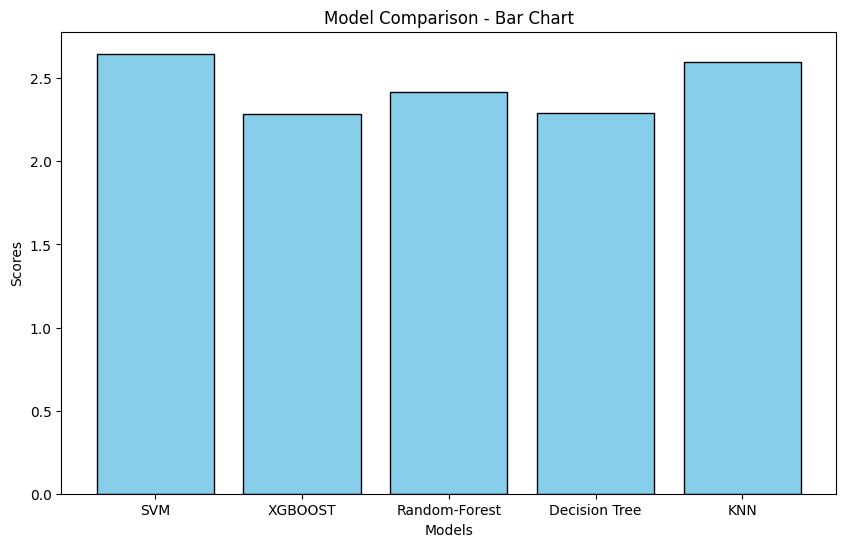

In [ ]:
# Extract model names and scores
model_names = list(dic_scores.keys())
model_scores = list(dic_scores.values())

# Plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(model_names, model_scores, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison - Bar Chart')


# Display the plot
plt.show()

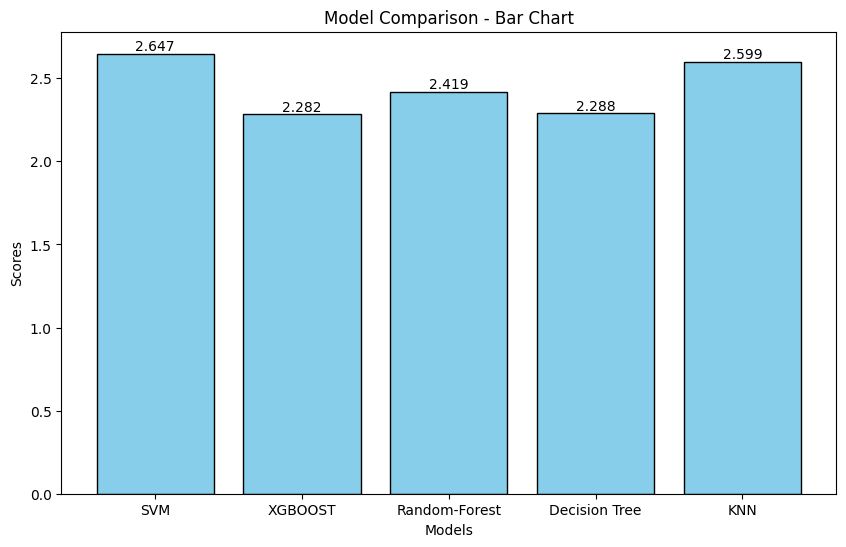

In [ ]:
# Extract model names and scores
model_names = [list(score.keys())[0] for score in scores]
model_scores = [list(score.values())[0] for score in scores]

# Plot
plt.figure(figsize=(10, 6))  # Set figure size
bars = plt.bar(model_names, model_scores, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison - Bar Chart')


# Display the score value on top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        height,                             # Y-coordinate
        f'{height:.3f}',                    # Format the value to 3 decimal places
        ha='center',                        # Horizontal alignment
        va='bottom'                         # Vertical alignment
    )

# Display the plot
plt.show()